In [1]:
import pandas as pd
import numpy as np

In [2]:
filename='E017_15_coreMarks_stateno.bed'

In [3]:
df_raw=pd.read_csv(filename, sep='\t', lineterminator='\n', header=None)
df_raw.head(10)

/home/lee/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3
0,chr1,0,9800,15
1,chr1,9800,10800,9
2,chr1,10800,13000,15
3,chr1,13000,13200,7
4,chr1,13200,16000,5
5,chr1,16000,17200,4
6,chr1,17200,19200,5
7,chr1,19200,79000,15
8,chr1,79000,93600,14
9,chr1,93600,540400,15


In [4]:
df=df_raw.rename(columns={0:"chromosome",1:"start",2:"end",3:"state"})
df.head()

,chromosome,start,end,state
0,chr1,0,9800,15
1,chr1,9800,10800,9
2,chr1,10800,13000,15
3,chr1,13000,13200,7
4,chr1,13200,16000,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635734 entries, 0 to 635733
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   chromosome  635734 non-null  object
 1   start       635734 non-null  object
 2   end         635734 non-null  object
 3   state       635734 non-null  object
dtypes: object(4)
memory usage: 19.4+ MB


In [6]:
len(df)

635734

In [7]:
df.tail(1)

,chromosome,start,end,state
635733,track,"name=""E017_15_coreMarks""","description=""",E017


In [8]:
df=df[:-1] # if deprecated, use df=df.iloc[:-1]

In [9]:
df.tail(1)

,chromosome,start,end,state
635732,chrY,59033400,59373400,15


In [10]:
df["start"]=pd.to_numeric(df["start"])
df["end"]=pd.to_numeric(df["end"])

In [11]:
df["start"].dtype

dtype('int64')

In [12]:
df["end"].dtype

dtype('int64')

In [13]:
df["state"].dtype

dtype('O')

In [14]:
df["state"]=pd.to_numeric(df["state"])
df["state"].dtype

dtype('int64')

In [15]:
df["length"]=df["end"]-df["start"]

In [16]:
df.head()

,chromosome,start,end,state,length
0,chr1,0,9800,15,9800
1,chr1,9800,10800,9,1000
2,chr1,10800,13000,15,2200
3,chr1,13000,13200,7,200
4,chr1,13200,16000,5,2800


In [17]:
df["unit"]=(df["length"]/100).astype(int)

In [18]:
df.head()

,chromosome,start,end,state,length,unit
0,chr1,0,9800,15,9800,98
1,chr1,9800,10800,9,1000,10
2,chr1,10800,13000,15,2200,22
3,chr1,13000,13200,7,200,2
4,chr1,13200,16000,5,2800,28


In [19]:
df["unit"].dtype

dtype('int64')

In [20]:
state_dict={
    1:"A", 2:"B", 3:"C", 4:"D", 5:"E",6:"F",7:"G",8:"H" ,9:"I" ,
    10:"J",11:"K", 12:"L", 13:"M", 14:"N", 15:"O"
}

In [21]:
print(state_dict)

{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O'}


In [22]:
df["state_seq"]=df["state"].map(state_dict)
df.head()

,chromosome,start,end,state,length,unit,state_seq
0,chr1,0,9800,15,9800,98,O
1,chr1,9800,10800,9,1000,10,I
2,chr1,10800,13000,15,2200,22,O
3,chr1,13000,13200,7,200,2,G
4,chr1,13200,16000,5,2800,28,E


<AxesSubplot:>

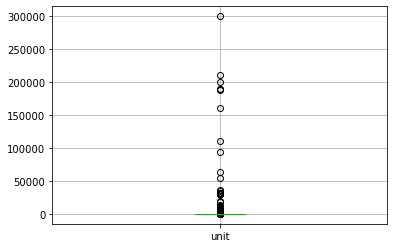

In [23]:
df.boxplot(column="unit")

array([[<AxesSubplot:title={'center':'unit'}>]], dtype=object)

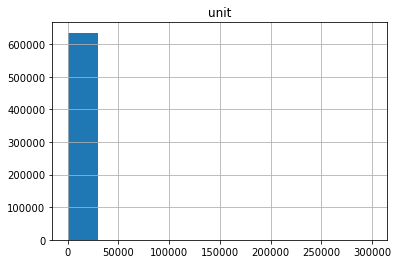

In [24]:
df.hist(column="unit")

In [25]:
df["state"][(df["unit"]<100)&(df["unit"]>50)].describe()

count    69601.000000
mean        10.951624
std          4.393481
min          1.000000
25%          5.000000
50%         14.000000
75%         15.000000
max         15.000000
Name: state, dtype: float64

In [26]:
df["state"][df["unit"]>5000].describe()

count    48.0
mean     15.0
std       0.0
min      15.0
25%      15.0
50%      15.0
75%      15.0
max      15.0
Name: state, dtype: float64

In [27]:
len(df["state"][df["unit"]>10000])

37

In [28]:
df["unit"].describe()

count    635733.000000
mean         48.694836
std         757.183796
min           2.000000
25%           6.000000
50%          16.000000
75%          42.000000
max      300004.000000
Name: unit, dtype: float64

In [29]:
df_first10=df.head(10)

In [30]:
df["state_seq_full"]=df["unit"]*df["state_seq"]

In [31]:
df.head()

,chromosome,start,end,state,length,unit,state_seq,state_seq_full
0,chr1,0,9800,15,9800,98,O,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
1,chr1,9800,10800,9,1000,10,I,IIIIIIIIII
2,chr1,10800,13000,15,2200,22,O,OOOOOOOOOOOOOOOOOOOOOO
3,chr1,13000,13200,7,200,2,G,GG
4,chr1,13200,16000,5,2800,28,E,EEEEEEEEEEEEEEEEEEEEEEEEEEEE


In [32]:
df["state_seq_full"].head(10)

0    OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
1                                           IIIIIIIIII
2                               OOOOOOOOOOOOOOOOOOOOOO
3                                                   GG
4                         EEEEEEEEEEEEEEEEEEEEEEEEEEEE
5                                         DDDDDDDDDDDD
6                                 EEEEEEEEEEEEEEEEEEEE
7    OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
8    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
9    OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
Name: state_seq_full, dtype: object

In [33]:
df["state_seq_full"].describe()

count     635733
unique      3205
top           GG
freq       21819
Name: state_seq_full, dtype: object

In [34]:
state_seq_list=df["state_seq"].tolist()
state_seq_to_str=''.join([elm for elm in state_seq_list ])

In [35]:
state_seq_full_list=df["state_seq_full"].tolist()
state_seq_full_to_str=''.join([elm for elm in state_seq_full_list ])